Chidubem Orazulike  33638476 I worked and submitted alone

# **Title: Energy Efficiency Prediction for Different Buildings**

The energy efficiency of buildings is an important aspect in regards to sustainable development, playing a role in reducing green house gas emissions and energy comsumption. In this project i am to predict the heating load of different building shapes with their varying characteristics such as glazing area distrubution, orientation etc. 

I will be using a dataset containing the features X0 to X8 which are synonymous to the buldings design and an outcome variable representing the heating load. My analysis will involve data inspection, visualisation, preprocessing and the development of predictive models using two regression algorithms and a nueral network. The main goal will be to select the best performing models and evaluate their performance on a test set.

By the end of this project, I expect to gain insights into the relationships between the building's characteristics and its energy efficiency and develop reliable models that can be used for predicting the heating load of buildings in real world scenarios.

The first thing to do is to load the dataset itself. Following the way I was thought to load the data in the machine learning lab3 google colab file

In [ ]:
# Common imports for loading the data 
import numpy as np
import os
import pandas as pd

The next step via following the lab is to obtain the data i was thought following the labs. The method involves creating two functions. One function helps streamline loading the data and the other function helps streamline saving figures in my project.

In [ ]:
#obtaining the data
def load_data(file_name):
    data_path = os.path.join(os.getcwd(), file_name)
    return pd.read_csv(data_path)

# Where to save the figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(os.getcwd(), fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

The next stage is to take a look at the structure of the data set to get a better understanding of the data, I am working with. By inspecting the data structure i can identify any issues that may require preprocessing, such as missing values, incorrect data types or oputliers. The first step following the machine learning lab is inspecting the data's head.

In [ ]:
# calling the load_data function I defined earlier and passing the file name as the arguement. The function reads the csv file using pandas and returns a dataframe containing the data
# displaying the first few rows of the dataset to give insight into the columns and type of data contained within them
# the outcome variable to predict is Y 
data = load_data("datcw_na.csv")
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


Looking at the output of this i can immediately see that there is a missing value (NAN) in the X3 column of the first row. Indicating that i will need to handle missing values during data preprocessing. Another insight i gained by looking at this data is that some buildings have different categories in the range of (C1,C2,C3) for each of the bulidngs. These categories could later on provide insight to how the bulidng category influences the heating load. This wasn enough in regards to gaining a full understanding of the dataset so the next thing I did was to print out the shape of the data.

In [ ]:
#looking at the number of rows and columns in the dataset
data.shape

(768, 10)

This helps me understand the size of my dataset which is essential, i was thought undertsandiung this was key to assessing the computational requirments for data processing and model training, for example neural network layers require you to ensure the data being passed through it is the require shape set as the parameter set.

The next step was to obtain information about the dataset, such as the number of entries, column names, data types and the total missing number of null values in each column. This will be done by using the .info method

In [ ]:
#getting the information of the dataset such as number of entries, column names, data types and number of null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      768 non-null    object 
 1   X1      768 non-null    float64
 2   X2      768 non-null    float64
 3   X3      728 non-null    float64
 4   X4      768 non-null    float64
 5   X5      768 non-null    float64
 6   X6      768 non-null    float64
 7   X7      768 non-null    float64
 8   X8      768 non-null    float64
 9   Y       768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


Two things can be identified when looking at this. For one the X3 column has only 728 non null values meaning it is the only column with missing nan values in it. This also means the column has 40 missing values to be dealt with either by dropping them, or filling the empty rows with the median or the mean like i was taught.  The second thins isn that most of the columns have a float 64 data type except for the X0 column which has an object(string) data type meaning it is categorical data.

I decided to ensure that the categories was c1 - c3 and how many of buildings belong to each category, by using the value_counts method i was taught in the labs. 

In [ ]:
#calculating the frequency distibution of unique values in the X0 column of the dataframe
data["X0"].value_counts()

C2    265
C3    260
C1    243
Name: X0, dtype: int64

This data shows that i have 243 buildings in category C1, 265 buildings for C2 and 260 buildings in C3. The distribution of the buildings seem to be mostly balanced, with a similar number of instances for each bulding category. This is good as having a balanced distribution ensures the models i create are exposed to a representative sample of each category during the time i train the models.

Following my labs structure the next step was to generate summary statistics for the numerical columns in the dataset such as cont, mean, standard deviation etc. This would help me see the data's distribution and help identify potential outliers, incorrect data types or inconsistent units or scale and skewed proportions. I was toldn this in the lab video.

In [ ]:
# This is a description of the data counts and distributions of variables
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
count,768.000000,768.000000,728.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,321.102527,176.564141,5.229766,3.527331,0.237852,2.803737,22.307201
std,0.147093,120.863329,60.479340,51.280618,1.844813,1.245710,0.139736,1.597817,10.090196
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.427500,0.100000,1.517500,12.992500
50%,0.750000,661.500000,315.320000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


Observations to be made from this output. There are 40 missing values in x3 as the count is 728  while the total number of instances in the dataset is 768. I will have to decide how to handle that later on. The min and max values of  the ranged and mean of the different features differe significantly, meaning the data will most liekly require scaling, especially for models that are senstive to the scale of the input features. The standard deviations of the features X2 and X3 are relatively high, this indicates they have the wider spread in the data. Features like X7 have a lown standard deviation, indicating a narrow spread of values. The minimum value for the glazing area x7  is 0 meaning some of the buildings within it have no glazing area at all. The heating load feature Y has a wide range of values from a minimum of 6.01 to a maximum of 43.1, with a mean ofn 22.31. This points to a hypothesis that the heating load varies significantly across the buildings in the dataset. I believe from a numerical standpoint i have done all i can to understand the data the next step is to plot the data vissually.

Plotting data Visualisations to use for data inspections 


Saving figure attribute_histogram_plots


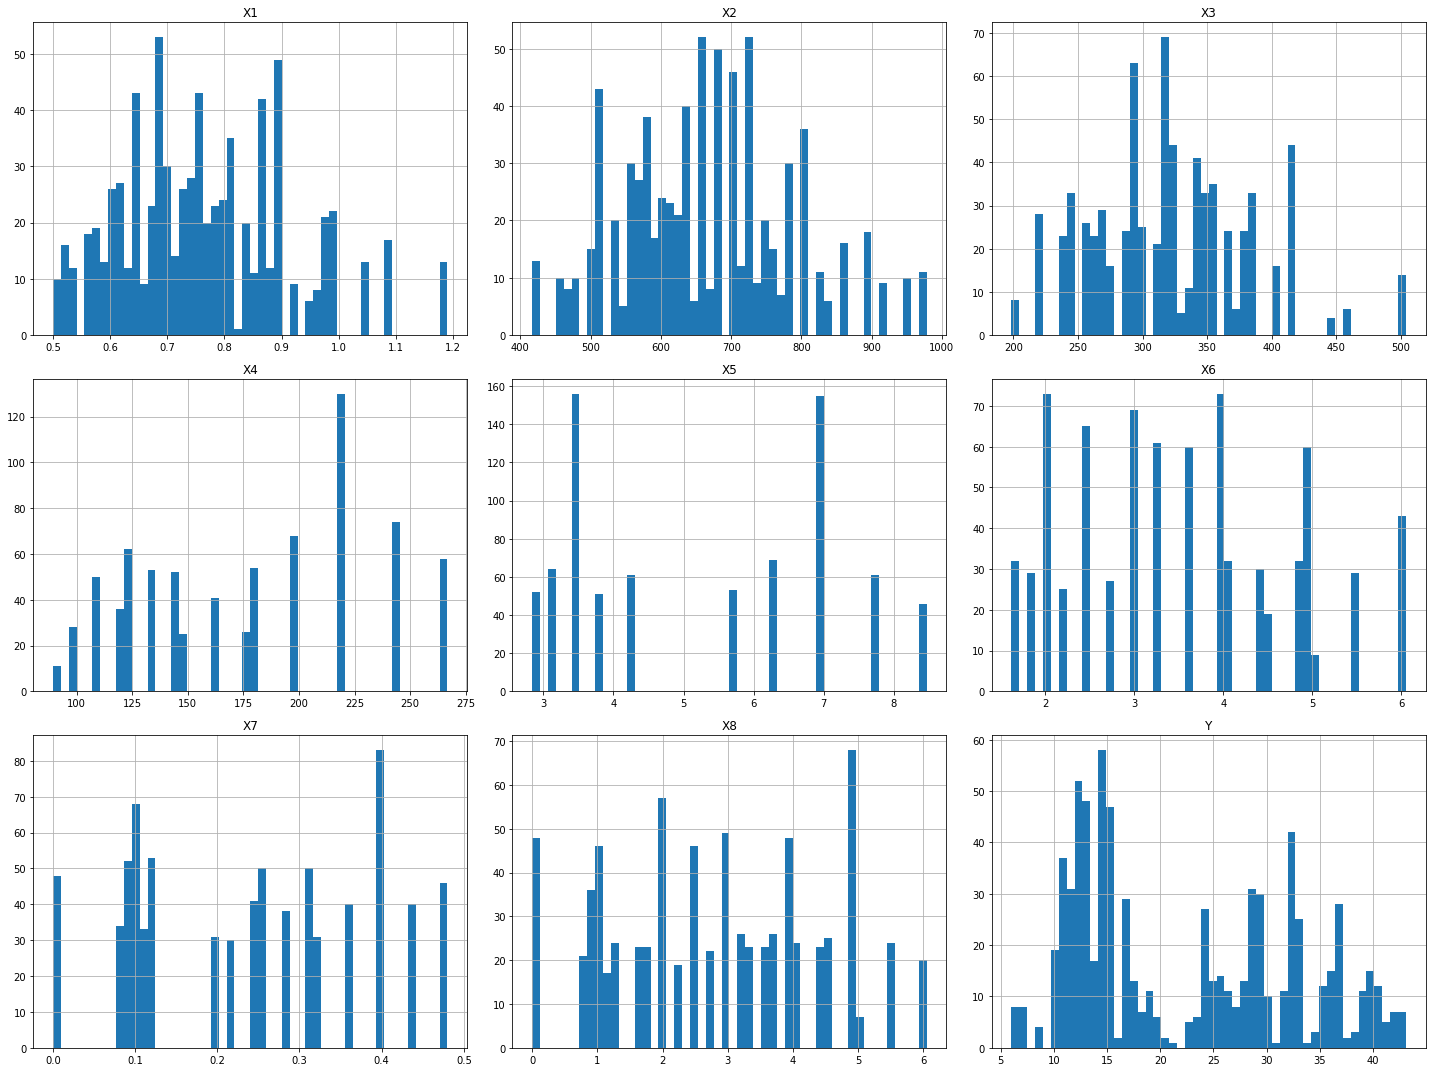

In [ ]:
# Visually inspecting the data with histograms showing bars of frequencies of numeric values grouped in bins.
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

I plotted these histograms based on the example in the scikit learning book (Hands-on Machine Learning with
Scikit-Learn, Keras, and
TensorFlow
Concepts, Tools, and Techniques to
Build Intelligent Systems) page 79. After visually inspecting this graph i felt theses graphs was both vissually please nor did i feel it represented the data correctly so i decided to investigate ways to plot histograms that would be actually effe4ctive for depicting the data accurately. https://www.qimacros.com/histogram-excel/how-to-determine-histogram-bin-interval/ Looking at this website it seems the general consensus is to use the square root of how many samples there are in the data.

In [ ]:
# Print the number of rows in the 'data' DataFrame
print(data.shape[0])

768


As we know it is 768 so we do the square root of that which is around 27.7 so we round up to 28

As you can see now and previously it is 768 so we do the square root of that which is around 27.7 so we round up to 28

Saving figure attribute_histogram_plots


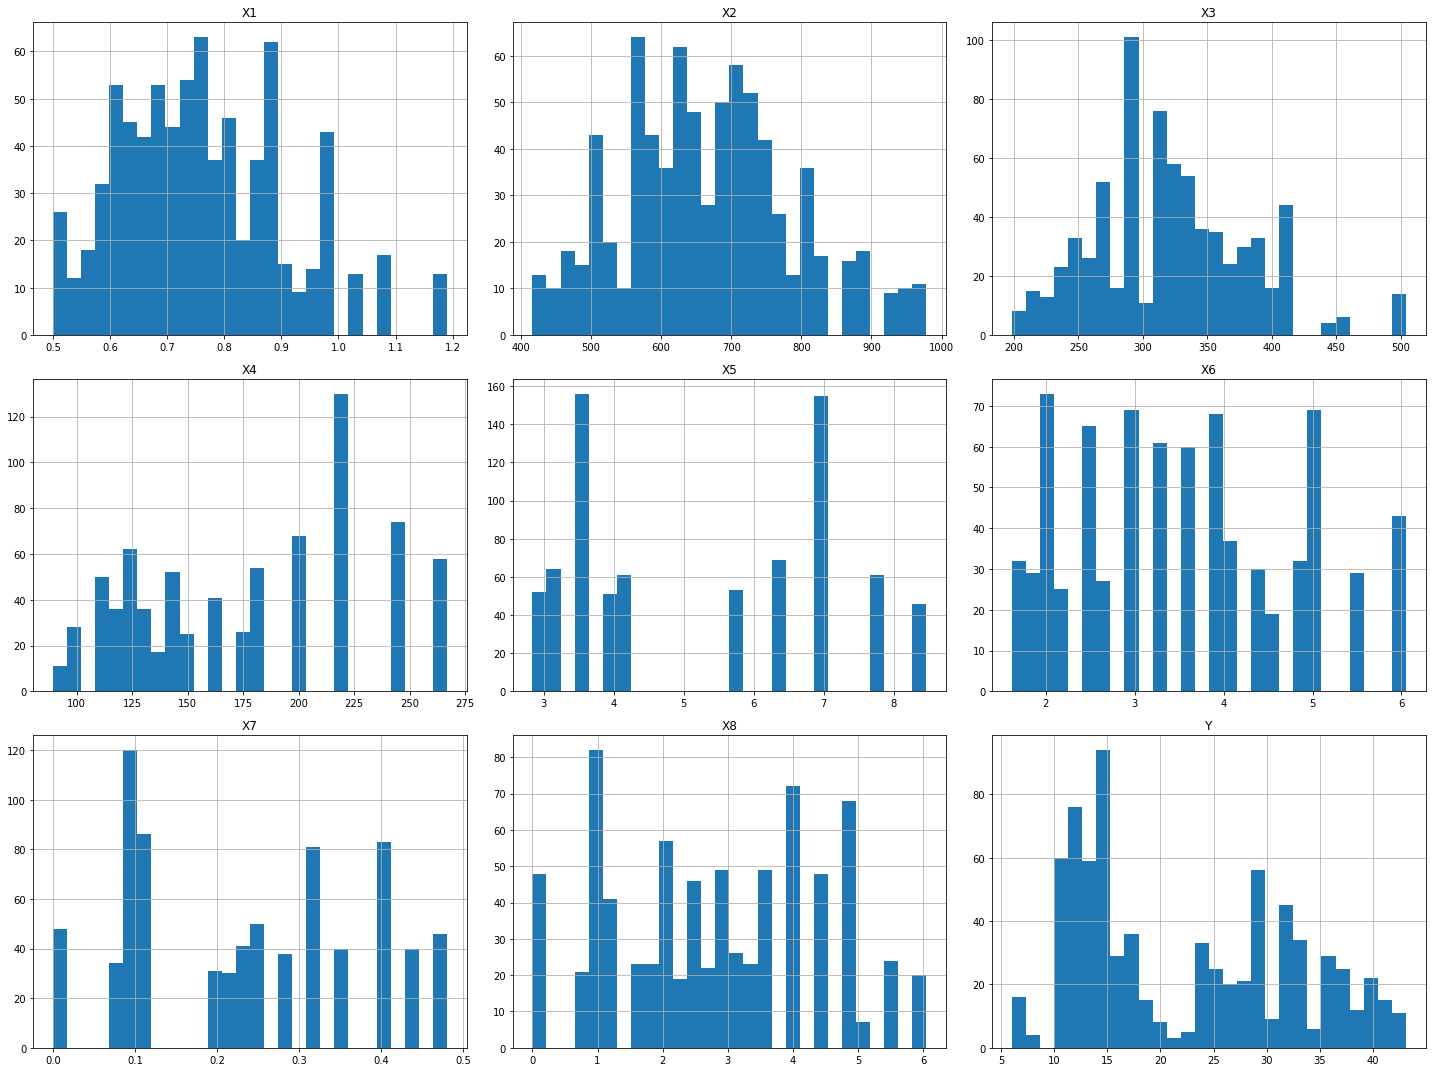

In [ ]:
# Plot histograms for each feature in the 'data' DataFrame
data.hist(bins=28, figsize=(20,15))
# Save the generated histogram plots to a file named "attribute_histogram_plots"
save_fig("attribute_histogram_plots")
# Display the histogram plots
plt.show()

As you can see this visual representation is far clearer and easier to inspect than the example histogram.

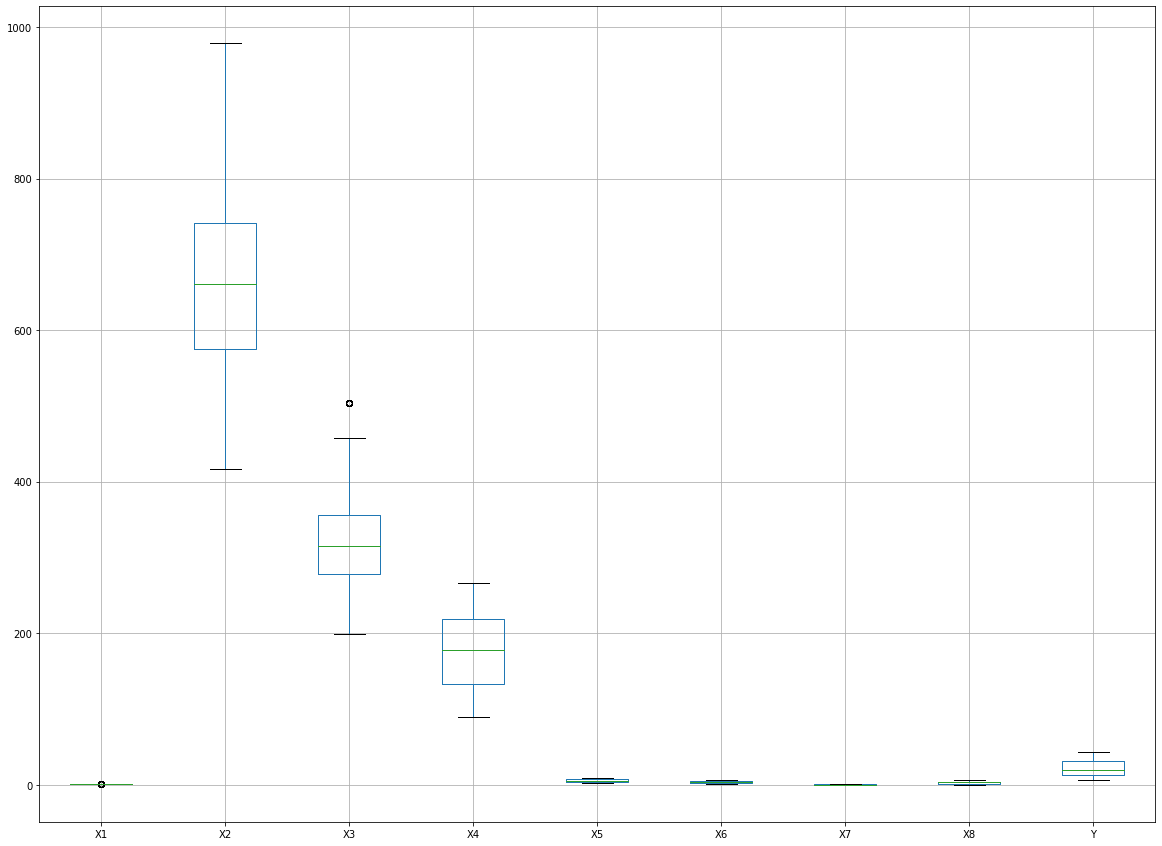

In [ ]:
# Plot boxplots for each attribute in the dataset
# The figsize parameter sets the size of the entire plot in inches (width, height)
data.boxplot(figsize=(20,15))

# Display the boxplots on the screen
plt.show()


I decided to plot box plots as Im not really sure i can identify outliers in my data so i decided to implement a mathematical method instead.

Following the structure of the book and the lab the advice given was to create a test set  


Creating a test set

In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)

The next step following the guidelines on how i was taught was to split the data into training and testing sets. The test set will be used to evaluate the models performance on unseen data. The split i will be using will be based on hown the coursework determined the data should be split which is 70 30.

In [ ]:
# Import the train_test_split function from the sklearn library
from sklearn.model_selection import train_test_split

# Split the dataset into a training set (70%) and a test set (30%)
# 'random_state' is set to 42 to ensure that the random split is reproducible
train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)


In [ ]:
train_set.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
334,C3,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99,15.08
139,C3,0.63,705.60,339.57,198.45,3.85,6.05,0.10,1.98,15.19
485,C2,0.99,557.86,315.32,110.25,6.30,3.30,0.28,5.00,32.31
547,C1,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99,41.67
18,C2,0.71,630.63,377.30,119.07,5.67,3.60,0.00,0.00,29.63


This gives me insight on what the train set looks like

In [ ]:
test_set.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
668,C2,0.68,800.42,444.68,242.55,3.47,1.98,0.32,3.63,16.47
324,C2,0.59,683.55,350.35,242.55,3.47,2.42,0.25,0.90,13.17
624,C2,0.97,509.36,291.06,121.28,5.67,1.62,0.32,2.70,32.82
690,C2,0.64,700.70,339.57,161.70,6.93,3.96,0.40,3.60,41.32
473,C1,0.77,776.16,NaN,266.80,3.47,2.97,0.25,4.40,16.69


This gives me insight on what the test set looks like

# **Correlations**

I decided against using a stratified shuffle split as i dont believe it is necessary from what i have learnt it should only be incoporated when there are imbalances in the dataset, or the target variable is categorical.

Correlations Next i decided to investigate the nature of the relationships of the different attributes and to also visualise them through scatterplots and different visualisations related. First i wanted to see how much each attribute correlates with the heating load numerically.

In [ ]:
# Compute the correlation matrix for the 'train_set' DataFrame
corr_matrix = train_set.corr()
# Sort the correlation coefficients of the target variable 'Y' in descending order
corr_matrix["Y"].sort_values(ascending=False)

Y     1.000000
X5    0.809140
X1    0.444701
X3    0.308799
X7    0.273489
X8    0.076206
X6    0.021983
X2   -0.499603
X4   -0.774212
Name: Y, dtype: float64

Here is the interpretation of the results.
X5: Positive correlation (0.809140). As the value of X5 increases, the value of Y tends to increase as well. This is the strongest correlation among the features.
X1: Positive correlation (0.444701). As the value of X1 increases, the value of Y tends to increase, but the relationship is weaker than with X5.
X3: Positive correlation (0.308799). As the value of X3 increases, the value of Y tends to increase, but the relationship is weaker than with X1 and X5.
X7: Positive correlation (0.273489). As the value of X7 increases, the value of Y tends to increase, but the relationship is weaker than with X3.
X8: Positive correlation (0.076206). As the value of X8 increases, the value of Y tends to increase, but the relationship is very weak.
X6: Positive correlation (0.021983). As the value of X6 increases, the value of Y tends to increase, but the relationship is very weak and close to no relationship.
X2: Negative correlation (-0.499603). As the value of X2 increases, the value of Y tends to decrease.
X4: Negative correlation (-0.774212). As the value of X4 increases, the value of Y tends to decrease. This is the strongest negative correlation among the features.

Next I wanted to see a combination of both visually and numerically using a heat map

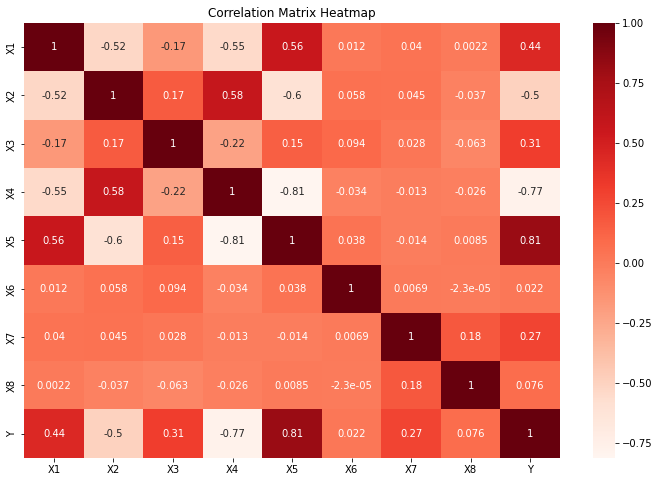

In [ ]:
# Import the seaborn library for advanced plotting
import seaborn as sns
# Create a new figure with a specified size
plt.figure(figsize=(12, 8))
# Plotting a heatmap of the correlation matrix with annotations and a specified color map Reds
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
# Setting the title for the heatmap
plt.title('Correlation Matrix Heatmap')
#displaying the heatmap 
plt.show()

The correlationn coefficient ranges from -1 to 1. When it is close to one it means there is a strong positive correlation. Generally speaking taller buildings have a larger surface area, which increases the amount of heat loss through the walls, windows and roof, so the taller the building the greater the heating load. When the coefficient is close to -1 it means that there is a negative correlation for example you can see a negative correlation between x2 and the heating load y. Coefficients close to zero means that there is no linear correlation.

Correlation_examples2.svg

The figure above shows various plots along with the correlation coefficient between their and horizontal and vertical axes. The correlation coefficient only measures linear correlations, it may completely miss non linear relationships. Using this image in combination with the scatter plots i will be plotting i can identify the correlations of all the attributes.

Saving figure scatter_matrix_plot


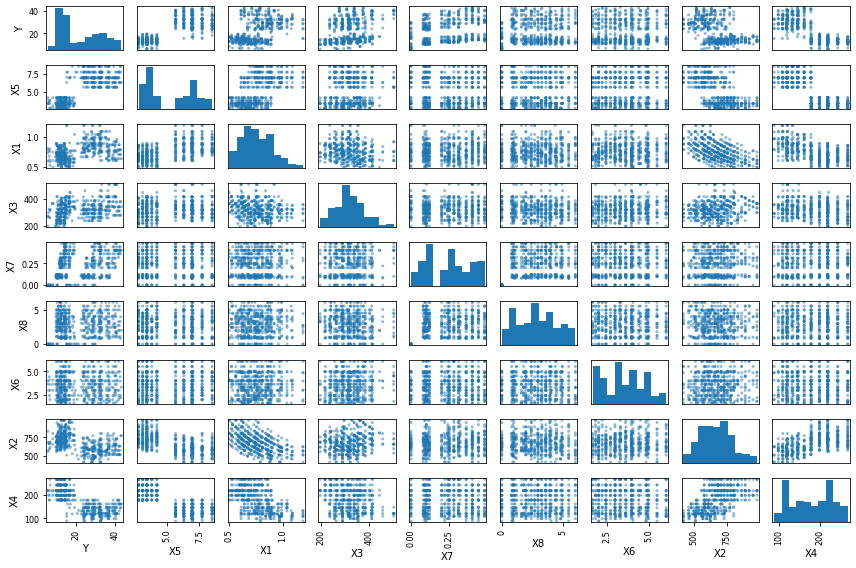

In [ ]:
# Importing the scatter_matrix function from pandas.plotting
from pandas.plotting import scatter_matrix
# Defining the list of attributes to be included in the scatter matrix
attributes = ["Y","X5", "X1",
              "X3", "X7", "X8", "X6", "X2", "X4"]
# Creating a scatter matrix of the specified attributes with a specified figure size
scatter_matrix(train_set[attributes], figsize=(12, 8))
# Saving the scatter matrix plot using the custom save_fig function
save_fig("scatter_matrix_plot")


This plot as taught to me in the labs is important as it helps to see the visualisations regarding the different features and their correlations to the heating load, in addition it  helps identify the relationships of the other features with one another. Stronger correlations will be graphs that have tighter clustering of points around a straight line. 



Lets plot the attribute with the highest correlation with the heating load x5

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='X5', ylabel='Y'>

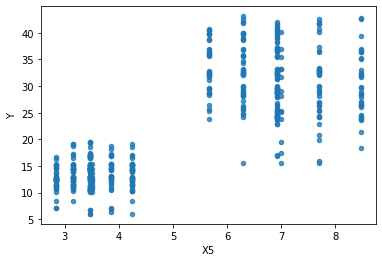

In [ ]:
#plotting the scatter plot of the feature with the highest correlation, with a higher alpha variable to make it clearer
train_set.plot(kind="scatter", x="X5", y="Y",
 alpha=0.8)

The easiest thing to spot is that as values of x5 increase so does the value of y showing a positve. The data seems to split into two segments from 3-4  the range of y values are the same for y then there is a dispersion across the middle from 4.5 to 5.5 meaning the data for that value range could be sparse. 

Lets plot the second most promising attribute

<Axes: xlabel='X1', ylabel='Y'>

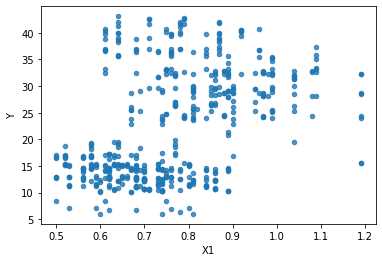

In [ ]:
train_set.plot(kind="scatter", x="X1", y="Y",
 alpha=0.8)

This plot looks better than the other plot, there is still a positive correlation but also there is a better spread of points across all values. 

## **Data Preprocessing**

Data Cleaning and Preprocessing 
The next stage was to clean the data preprocess it. This is essential as it ensures that the data is accurate and consistent, which is required for building reliable models. 

In [ ]:
#making a copy of the target variable and dropping it
train_set2 = train_set.drop("Y", axis=1)
train_set_labels = train_set["Y"].copy()




seperating the features and the target variable is a standard step in machine learning for model training.

In [ ]:
print(train_set_labels)

334    15.08
139    15.19
485    32.31
547    41.67
18     29.63
       ...  
71     32.21
106    26.33
270    10.67
435    28.62
102    28.83
Name: Y, Length: 537, dtype: float64


Checking to ensure only the labels are in train_set_label variable 

In [ ]:
train_set.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
334,C3,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99,15.08
139,C3,0.63,705.60,339.57,198.45,3.85,6.05,0.10,1.98,15.19
485,C2,0.99,557.86,315.32,110.25,6.30,3.30,0.28,5.00,32.31
547,C1,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99,41.67
18,C2,0.71,630.63,377.30,119.07,5.67,3.60,0.00,0.00,29.63


In [ ]:
train_set2.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8
334,C3,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99
139,C3,0.63,705.60,339.57,198.45,3.85,6.05,0.10,1.98
485,C2,0.99,557.86,315.32,110.25,6.30,3.30,0.28,5.00
547,C1,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99
18,C2,0.71,630.63,377.30,119.07,5.67,3.60,0.00,0.00


Base on the training set, we now prepare an inputer with the median for all numeric variables, in case future data will have missing values on some of these variables.

Also remove the text attribute because median can only be calculated on numerical attributes:

In [ ]:
# importing the simple imputer model and applying the startegy median 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

I decided to deal with the missing values using the median because looking back the lab video stated there are three ways to deal with missing values, dropping the rows with the empty values or imputing the missing values with the median or the mean if the amount of missing values isnt significant in comparison to the entire dataset. The last method is dropping the entire column which is only advised to do if the number of missing values is greater than or equal to 60 percent of the column/ I decided to use the median strategy as it would simulate the number most likely to occur in the place where the values are missing.

In [ ]:
#dropping the categorical data as simple imputer only works on numerical data 
train_set_num = train_set2.drop("X0", axis=1)

Only the features with numerical values can be imputed with the median meaning the categorical feature x0 had to be saved.

In [ ]:
train_set_num.head()

,X1,X2,X3,X4,X5,X6,X7,X8
334,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99
139,0.63,705.60,339.57,198.45,3.85,6.05,0.10,1.98
485,0.99,557.86,315.32,110.25,6.30,3.30,0.28,5.00
547,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99
18,0.71,630.63,377.30,119.07,5.67,3.60,0.00,0.00


In [ ]:
null_counts = train_set_num.isnull().sum()

# Print the number of null values in each column
print(null_counts)

X1     0
X2     0
X3    26
X4     0
X5     0
X6     0
X7     0
X8     0
dtype: int64


I wanted to see of the 40 missing values in x3 how many were in the training set. it seems 14 missing values were left in the test set and 26 are in the training set. This is excellent as its imperative the models i build are capable of handling unseen data with aspects like missing data and cetgorical data.

In [ ]:
#fitting the imputer to the training set
imputer.fit(train_set_num)

SimpleImputer(strategy='median')

  This code calculates this necessary statistics which in this case i chose to use the median. It calculates the median for each of the numerical features.

In [ ]:
# analyzing the median values calculated for each column 
imputer.statistics_

array([7.5000e-01, 6.6150e+02, 3.1532e+02, 1.7860e+02, 4.2400e+00,
       3.6000e+00, 2.5000e-01, 2.9700e+00])

Taking a look at what the statistic/ median are for each of the features 

In [ ]:
train_set_num.median().values

array([7.5000e-01, 6.6150e+02, 3.1532e+02, 1.7860e+02, 4.2400e+00,
       3.6000e+00, 2.5000e-01, 2.9700e+00])

I do this to ensure that it is the same to ensure the imputer works correctly the median.values method calculates the median for each feature in the numerical dataset.

Transform the training set
This applies the impute method since i have confirmed it works correctly to transform the training set. The transformation applies the calculation for the mean of each column.

In [ ]:
#transforming the data to fill in the missing values 
X = imputer.transform(train_set_num)

In [ ]:
# assigning it to a pandas dataframe
train_set_tr =  pd.DataFrame(X, columns=train_set_num.columns,
                          index=train_set2.index)

In [ ]:
train_set_tr.head()

,X1,X2,X3,X4,X5,X6,X7,X8
334,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99
139,0.63,705.60,339.57,198.45,3.85,6.05,0.10,1.98
485,0.99,557.86,315.32,110.25,6.30,3.30,0.28,5.00
547,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99
18,0.71,630.63,377.30,119.07,5.67,3.60,0.00,0.00


In [ ]:
null_counts1 = train_set_tr.isnull().sum()

# Print the number of null values in each column
print(null_counts1)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
dtype: int64


In [ ]:
train_set2.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8
334,C3,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99
139,C3,0.63,705.60,339.57,198.45,3.85,6.05,0.10,1.98
485,C2,0.99,557.86,315.32,110.25,6.30,3.30,0.28,5.00
547,C1,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99
18,C2,0.71,630.63,377.30,119.07,5.67,3.60,0.00,0.00


The codes there are to ensure the imputer worked correctly and there are no more missing values.

Handling Text and Categorical Categories
This is an important step as many machine learning algorithms are designed to work with numerical data. In order for the algorithms to learn meaniningful patterns from the data it is important for me to process them numerically. From the machine learning book it states that categorical handling allows for a better model perfomance as it enables the algorithm to capture underlying structure and data more effectively. 


I am going to transform the X0 columnn to numeric data

In [ ]:
# making a copy of the categorical values 
train_cat = train_set[["X0"]]


In [ ]:
train_cat.head(10)

,X0
334,C3
139,C3
485,C2
547,C1
18,C2
593,C1
140,C1
326,C2
266,C2
626,C1


I am going to use one hot encoding to encode the categorical data as i belive the x0 column's data is not ordered. From the book i read it states that encoding categorical variables makes the model more interpretable. Initially i was going to use ordinal encoding as its used to maintain the order of the categorical data but after a discussion with my lecturer i relised my assumption isnt necessarily the case, essentially there was no ground for my basis of thinking the categories where correctly assigned to each row specifically. The book then states that one hot encoding creates binary features that are easier to intepret in linear models and since this is a regression problem i felt they both went hand in hand.

In [ ]:
#importing the one hot encoder mopdule 
from sklearn.preprocessing import OneHotEncoder
#assinging the encoder to the variable 
train_encoder = OneHotEncoder()
#transforming the catergorical data into numerical values 
train_cat_encoder = train_encoder.fit_transform(train_cat)
train_cat_encoder

<537x3 sparse matrix of type '<class 'numpy.float64'>'
	with 537 stored elements in Compressed Sparse Row format>

By default, the OneHotEncoder class returns a sparse array, but I can convert it to a dense array if needed by calling the toarray() method:

In [ ]:
train_cat_encoder.toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Alternatively, I can set sparse=False when creating the OneHotEncoder:

In [ ]:
train_encoder = OneHotEncoder(sparse_output=False)
train_cat_encoder = train_encoder.fit_transform(train_cat)
train_cat_encoder

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## **Transformation Pipelines**

Transformation Pipelines
After a lot of reading i discovered that using a transformationn pipeline is important because it streamlines the process of data preprocessing. It was described to provide an organized and efficient way to manage data transformations and most essential of all it makes reproducible meaning once the pipeline is created all i have to do is to pass my test set through the pipeline and it will be ready for my models. Saving alot of time compared to imputing the median manually and then handling the categorical data. 


In [ ]:
#importing the pipeline module and the scaler module to standardize the data 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#creating a pipeline that ensures that missing values are filled with the mean and scaled to values between 0 and 1
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

train_set2_num_tr = num_pipeline.fit_transform(train_set_num)

Im performing two data preprocessing steps i am applying the median to the numerical features in the training data set and then scaling the data to values that are between 0.0 and 1.0. This model pipeline was sourced from this book (Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow
by Aurélien Géron) page 99.  The pipeline is created using the Pipeline class from Scikit-Learn. It handles the missing values in the data set by replacing them with the median and then it standardizes it  and stores it in train_set2_num_tr.

In [ ]:
#importing the column transformer to change the entire columns according to the transformation required
from sklearn.compose import ColumnTransformer
# making a list of the numerical attributes 
num_attribs = list(train_set_num)
# stating which column is the categorical attribute 
category_attributes = ["X0"]
# passing the computations of the numerical and categorical attributes to the pipeline
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), category_attributes)
    ])
# transforming the entire dataset with the necessary preprocessing
training_data_prepared = full_pipeline.fit_transform(train_set2)

The column transformer works in combination with the numerical transformation pipeline to apply the full process of filling missing values with the median, standardising it and converting the numerical attributes to categorical attributes. The whole transformation is applied to the dataset with the missing values and categorical data still intact. Thats why i made seperate copies to prevent confusion. The other copies were used to train the pipeline and now the pipeline is applied to the dataset with no changes made to it apart from dropping the target variable. This all occurs by using the .fit_transform to intialize the changes to the dataset. 

In [ ]:
training_data_prepared.shape

(537, 11)

The data has changed after pipeline transformation with the columns being increased by 2 i suspect this is due to the application of one hot encoding as it most likely created 3 new columns for c1, c2, c3. One hot encoding creates binary columns for each category found in the x0 column.

Selecting and Training a Model. 
The models i decided to employ were Linear regression, Ridge Regression and Nueral networks. First of all Linear Regression. It is a simplistic model that can be easily understood and interpreted. It provides a straight forward way to understand the relationships between the fatures and the target variable heating load. Linear Regression Models can also be trained quickly and the coefficients  are directly interpretable allowing me to understand the influence of each feature on the target variable. Ridge Regression is similar to linear regression so it was my next best choice.  The model also allows for tuning by the alpha  and solver parameters allowing me to tune the model and choose the best parameters that grant the best performance. Finally my choice of using a neural network is due to the fact that i am already used to applying the model as im using the same model in my final project so it would be easier for me to implement. Aside from that neural networks can capture complex, nonlinear relationships between features and the target variable heating load and are typically used for complex  datasets. From what i've been taught and witnessed neural networks always surpass all other models performance when trained properly. It also offers a wide range of architecture choices and activation functions allowing me to better customize the model to fit this regression problem. 


## **Training and Evaluating on the training set**

I wanted to determine the importance of the features in my dataset and i read this article on something known as PCA (Principle Component Analysis)https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186#:~:text=Principal%20component%20analysis%2C%20or%20PCA,more%20easily%20visualized%20and%20analyzed. Reading this article I was intruiged and wanted to calculate the importance of features by analyzing the principal components and their ability to identify the importance of each feature. 

In [ ]:
#using pca to identify the important components 
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(training_data_prepared[:])
PCA(n_components=8)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.32625407 0.14355461 0.13630281 0.11013138 0.09498148 0.05343101
 0.03994529 0.03855993]
[38.96487266 25.84662627 25.18533315 22.6386662  21.02397158 15.76855837
 13.63414968 13.39563887]


The output for this code is the explained variance ratio and the singular value. The explained varience ratio represents the proportion of the total variance in dataset that is explained by each principal component. The values in this array indicate percentage of the total variance  captured by each of the 8 first principal components . The singular values represent the square root of the eigenvalues  of the covariance matrix of the dataset. The singular values indicate the magnitude of each principle component's contribution to the dataset. Looking at this I believe the values show that all the features are necesary for analysis and none should be dropped as they seem to all contribute to the overall dataset variance. 

In [ ]:
train_set2.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8
334,C3,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99
139,C3,0.63,705.60,339.57,198.45,3.85,6.05,0.10,1.98
485,C2,0.99,557.86,315.32,110.25,6.30,3.30,0.28,5.00
547,C1,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99
18,C2,0.71,630.63,377.30,119.07,5.67,3.60,0.00,0.00


## **Linear Regression**

In [ ]:
# fitting a simple linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(training_data_prepared, train_set_labels)

LinearRegression()

I  fit the linear regression model with the training data and the training labels. I then proceed to train the model so that it can learn to identify the relationship between the input features(the x features )  and the target variable y/ heating load 

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = train_set2.iloc[:5]
some_labels = train_set_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [12.43433171 14.64306379 30.11799368 34.95301158 23.54064133]


It seems to be perfoming relatively well. The machine learning book advices to use the trained linear regression model to make predictions on a small subset of the training data to see how the model performs. This is because training on small subsets of data allows me to get a fast idea of how well the model is working. It also allows for faster debugging as it can help me identify potential issues with the model.

In [ ]:
print("Labels:", list(some_labels))

Labels: [15.08, 15.19, 32.31, 41.67, 29.63]


The results of the predicted values and the actual values are not the same but they are sort of close for instance 15.08 to 12.43 is only a difference of 2.45 which is appropriate for linear regression as it is an approximation of the relationship between the input features and the target variable. 

In [ ]:
some_data_prepared

array([[-1.03443078,  1.07099616,  0.74848195,  1.29072766, -1.26105905,
         0.35749091,  0.00490148, -1.16327892,  0.        ,  0.        ,
         1.        ],
       [-0.89814782,  0.29534228,  0.33497246,  0.41168626, -0.71673846,
         2.08630327, -0.99102645, -0.54348139,  0.        ,  0.        ,
         1.        ],
       [ 1.55494538, -0.91321187, -0.07853703, -1.34639653,  0.60364318,
        -0.18844984,  0.28945232,  1.34721409,  0.        ,  1.        ,
         0.        ],
       [-0.353016  , -0.3179331 ,  0.33497246, -1.17058826,  1.35814697,
         2.08630327,  0.858554  , -1.16327892,  1.        ,  0.        ,
         0.        ],
       [-0.353016  , -0.3179331 ,  0.97834207, -1.17058826,  0.26411647,
         0.05970505, -1.70240355, -1.78307645,  0.        ,  1.        ,
         0.        ]])

Just ensuring that there wasnt any changes to the small subset used to test the model.

In [ ]:
from sklearn.metrics import mean_squared_error
#calculating the mean squared error from the predictions which is how far way from the actual values of y the predictions are
train_set_predictions = lin_reg.predict(training_data_prepared)
lin_mse = mean_squared_error(train_set_labels, train_set_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


4.522586051646868

I decided to measure the models rmse. As rmse is a measure of  a models performance. It measures the average difference between the predicted values and the actual values in the  dataset. It provides a numerical measure of the model performance and for me my linear regression model got an rmse of 4.522. This is pretty good as a lower rmse score means the model is better at predicting the target variable while a higher rmse means my model has a larger predition error/gap.

The next step would be to calculate the models perfomance using other units of measurements such as  mean, standard deviation from cross validation. Cross validation provides a more accurate estimate of a models perfomance. The book taught me that is splits the training set into how ever many folds you want by changing the value of the cv following the books example i use 10 as 10 is a minimum requirement of folds in the machine learning world. After the folds are mad it evaluates the linear regression model 10 times picking a different fold for evaluation everytime and training on the other 9 folds. The result is an array containg 10 evaluation scores. 

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, training_data_prepared,train_set_labels, scoring="neg_mean_squared_error", cv=10)
lin_mse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores) 
  print("Mean:", scores.mean()) 
  print("Standard deviation:", scores.std())

display_scores(lin_mse_scores)

Scores: [4.60057551 4.25456237 4.99290609 4.58111705 4.91948389 4.33629243
 4.83667201 5.07503353 5.05877518 3.49221081]
Mean: 4.614762886444052
Standard deviation: 0.465062740285616


As we can see from the scores the mean rmse of the cross validation is slightly worse than the rmse of the linear regression model by it self. This is well within calculations as when i am perfoming cross validation i am evaluatiing the models perfomance of different subsets of data that it was not trained on as the original model was trained on the whole dataset all in one go. Cross validation provides a more realistic assesemnt of the models performance and i believe is a more realistic performance the model would have when dealing with unseen data. The mean score is the average of the rmse across all 10 folds. The cross validation standard deviation is a measure of how the models perfomance varies across each of the different folds. Since the standard deviation is small it shows the linear regression model is performing rather well. 

## **Ridge Regression**

Using Ridge Regression 
I set up the model following the sci-kit learn book page 165

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(training_data_prepared, train_set_labels)
train_set_predictions = ridge_reg.predict(training_data_prepared)
ridge_mse = mean_squared_error(train_set_labels, train_set_predictions)
ridge_rmse = np.sqrt(ridge_mse)

In [ ]:
print("Ridge Regression RMSE on training set:", ridge_rmse)

Ridge Regression RMSE on training set: 4.522611698211332


The ridge regression model set up is the same as the linear regression model which is useful as it took little time to setup.The rmse score of the ridge regression model is actually worse than the linear regression model. i believe this is because the regularisation strength alpha was the most optimal for the dataset same for the solver. Ridge regression requires tuning to work optimally so its actually expect to perform worse on the first go to linear regression as linear regression doesnt need hyperparameter tuning. 

In [ ]:
from sklearn.linear_model import SGDRegressor

# Create Ridge Regression instance with SGD solver
ridge_sgd_reg = SGDRegressor( penalty='l2')

# Fit the Ridge Regression model to training set using SGD
ridge_sgd_reg.fit(training_data_prepared, train_set_labels)

# Make predictions on training set
train_set_predictions = ridge_sgd_reg.predict(training_data_prepared)

# Calculate RMSE
ridge_sgd_mse = mean_squared_error(train_set_labels, train_set_predictions)
ridge_sgd_rmse = np.sqrt(ridge_sgd_mse)

# Print RMSE results
print("Ridge Regression with SGD RMSE on training set:", ridge_sgd_rmse)


Ridge Regression with SGD RMSE on training set: 4.522982207203784


I was taught SGD is a good way to get performance evaluation as it displays the performance of the model with a penalty such as l2 to reduce overfitting. So i implemented the SGD from the book. It rmse was only slightly worse by 0.003 so it means the model performance isnt a fluke or an anomaly. 

The next stage was the tuning of ridge regression, from what i was taught of the book, ridge regression model perfomace is dependent on the choice of hyperparameters such as the regularisation strength  and the solver. 

Tuning Ridge Regression
I decided to implement grid search as it performs an exhaustive search over the specified hyperparameters space ensuring all possible combinations of hyperparameters are explored. Its also easier than me manually tuning each of the hyper paramters by hand. I looked at this website to find the possible combinations for solvers https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html. For the alpha values i decided to write a combination of what i believed made sense from the sci kit documentation. 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 200],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}


In [ ]:
# Create GridSearchCV instance
grid_search = GridSearchCV(ridge_reg, param_grid, cv=15, scoring='neg_mean_squared_error', return_train_score=True)

# Fit GridSearchCV to the training data
grid_search.fit(training_data_prepared, train_set_labels)

# Display the best parameters found
print("Best parameters: ", grid_search.best_params_)

# Get the best estimator (model) from the grid search
best_model = grid_search.best_estimator_

# Make predictions using the best model
train_set_predictions = best_model.predict(training_data_prepared)

# Calculate RMSE for the best model
best_model_mse = mean_squared_error(train_set_labels, train_set_predictions)
best_model_rmse = np.sqrt(best_model_mse)

# Print RMSE for the best model
print("RMSE for the best model:", best_model_rmse)

Best parameters:  {'alpha': 5, 'solver': 'sparse_cg'}
RMSE for the best model: 4.523199857732547


After a long time on it it chose these paramters as the best for the model 

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=5, solver="sparse_cg")
ridge_reg.fit(training_data_prepared, train_set_labels)
train_set_predictions = ridge_reg.predict(training_data_prepared)
ridge_mse = mean_squared_error(train_set_labels, train_set_predictions)
ridge_rmse = np.sqrt(ridge_mse)
print("Ridge Regression RMSE on training set:", ridge_rmse)

Ridge Regression RMSE on training set: 4.522611948499946


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridge_reg, training_data_prepared,train_set_labels, scoring="neg_mean_squared_error", cv=10)
ridge_mse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores) 
  print("Mean:", scores.mean()) 
  print("Standard deviation:", scores.std())

display_scores(ridge_mse_scores)

Scores: [4.60202086 4.25054676 4.99670249 4.58377897 4.91783115 4.33657633
 4.83444548 5.07054001 5.05988387 3.49079052]
Mean: 4.614311644632213
Standard deviation: 0.46543844817832847


I followed the steps of using cross validation to evaluate its performance after the tuning. Before i use cross validation its performance is worse with the model by itself but after cross validation the mean rmse of the ridge regression is better than the rmse of the linear regression by 0.0004. Hence i am using it over linear regression. 

## **Nueral Network**

I use the Deep Learning
with Python
SECOND EDITION
FRANÇOIS CHOLLET second edition book as a guide to make my neural network. 

In [ ]:
train_set_labels

334    15.08
139    15.19
485    32.31
547    41.67
18     29.63
       ...  
71     32.21
106    26.33
270    10.67
435    28.62
102    28.83
Name: Y, Length: 537, dtype: float64

In [ ]:
array = train_set_labels.values

In [ ]:
array

array([15.08, 15.19, 32.31, 41.67, 29.63, 43.1 , 12.88, 13.17, 10.34,
       32.23, 11.16, 24.03, 31.28, 29.92,  6.4 , 15.16, 40.42, 14.6 ,
       36.43, 14.34, 11.53, 32.13, 36.57, 12.91, 10.72, 29.4 , 16.48,
       19.48, 16.74, 12.41, 14.21, 11.22, 13.99, 15.12, 36.7 , 27.03,
       32.15, 10.36, 33.28, 42.08, 26.48, 36.97, 12.63, 12.96, 14.34,
       15.2 , 12.46, 14.61, 19.13, 14.71, 11.64, 18.31, 10.56, 10.77,
       33.24, 32.74, 18.48, 14.66, 11.1 , 14.62, 12.78, 11.16, 36.47,
       31.29, 36.71, 19.2 , 29.47, 15.98, 14.61, 37.03, 31.63, 12.35,
       12.49, 25.43, 29.49, 32.33, 36.45, 16.66, 19.95, 26.45, 24.77,
       10.68, 14.16, 12.42, 14.12, 16.83, 39.32, 27.03, 35.69, 12.97,
       12.87, 15.09, 16.76, 12.59, 15.16, 17.15, 12.29, 26.47, 10.39,
       12.74, 11.34, 32.96, 40.11, 12.68, 13.69, 12.85, 15.41, 13.94,
       32.4 , 10.72, 32.12, 28.15, 13.  , 15.55, 15.16, 12.85, 32.85,
       28.15, 11.22, 14.18, 33.16, 11.44, 42.62, 14.32, 37.24, 11.11,
       12.57, 32.49,

I just do this to ensure that the values in the labels are correct and no changes throughout the course of the notebook occured to it. 

In [ ]:
nueral_network_train = training_data_prepared

I make a copy so that the actual traning data prepared is not affected in anway or form. Just a precaution. 

In [ ]:
nueral_network_train.shape

(537, 11)

I take a look at the shape of the data to ensure it is the correct training set that has gone through the pipeline. 

In [ ]:
nueral_network_train

array([[-1.03443078,  1.07099616,  0.74848195, ...,  0.        ,
         0.        ,  1.        ],
       [-0.89814782,  0.29534228,  0.33497246, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55494538, -0.91321187, -0.07853703, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.66910617, -0.76882997,  0.10528286, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.41866242, -1.30995531,  0.61070229, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.55494538, -0.91321187, -1.05629515, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
nueral_network_train_targets = array

In [ ]:
nueral_network_train_targets

array([15.08, 15.19, 32.31, 41.67, 29.63, 43.1 , 12.88, 13.17, 10.34,
       32.23, 11.16, 24.03, 31.28, 29.92,  6.4 , 15.16, 40.42, 14.6 ,
       36.43, 14.34, 11.53, 32.13, 36.57, 12.91, 10.72, 29.4 , 16.48,
       19.48, 16.74, 12.41, 14.21, 11.22, 13.99, 15.12, 36.7 , 27.03,
       32.15, 10.36, 33.28, 42.08, 26.48, 36.97, 12.63, 12.96, 14.34,
       15.2 , 12.46, 14.61, 19.13, 14.71, 11.64, 18.31, 10.56, 10.77,
       33.24, 32.74, 18.48, 14.66, 11.1 , 14.62, 12.78, 11.16, 36.47,
       31.29, 36.71, 19.2 , 29.47, 15.98, 14.61, 37.03, 31.63, 12.35,
       12.49, 25.43, 29.49, 32.33, 36.45, 16.66, 19.95, 26.45, 24.77,
       10.68, 14.16, 12.42, 14.12, 16.83, 39.32, 27.03, 35.69, 12.97,
       12.87, 15.09, 16.76, 12.59, 15.16, 17.15, 12.29, 26.47, 10.39,
       12.74, 11.34, 32.96, 40.11, 12.68, 13.69, 12.85, 15.41, 13.94,
       32.4 , 10.72, 32.12, 28.15, 13.  , 15.55, 15.16, 12.85, 32.85,
       28.15, 11.22, 14.18, 33.16, 11.44, 42.62, 14.32, 37.24, 11.11,
       12.57, 32.49,

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
def build_model():
 model = keras.Sequential([ 
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(1)
 ])
 model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
 return model


Due to the fact that there are so little samples available in comparison to a large dataset  a small model using two intermediate layers is used each withb 64 units, as the snmaller the training data is the worse the overfitting will be, so me using a small model is to help prevent overfitting. The model ends with a single unit and no activation layer. This was noted in the book to be a typical setup for scalar regression(which is when your trying to predict a single continuous value. 

In [ ]:

#using k fold validation to  to train the nueral network 
k = 4
num_val_samples = len(nueral_network_train) // k
num_epochs = 100
all_scores = [] 
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = nueral_network_train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = nueral_network_train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [nueral_network_train[:i * num_val_samples],
       nueral_network_train[(i + 1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [nueral_network_train_targets[:i * num_val_samples],
       nueral_network_train_targets[(i + 1) * num_val_samples:]],
       axis=0)
  model = build_model() 
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


I decided to validate my neural network approach using K-fold Validation. to evaluate my model i could just split the training set into training and a validation set but because further splitting the data would make the training set even smaller preventing the training of the neural networkk for being as effective as we know the more training data we have the better the performance of the model. Using K fold validation as i have done before allows me to split the data into multiple partitions, while evaluating the remaining partition. The validation score for the model is the mean of the k validation scores obtained. 

In [ ]:
all_scores

[2.7951431274414062, 2.82108211517334, 3.0417914390563965, 3.3036396503448486]

This is the output of all the scores after training the model with 100 epochs 

In [ ]:
np.mean(all_scores)

2.990414083003998

As expected an imporessive score that far surpasses the two other models. 

I then run the model for significantly longer for 500 epochs. The book taught me how to keep a record of how well the model does at each epoch in order to find the optimal epoch for my network. 

In [ ]:
# training the nueral network again but with more epochs 
k = 4
all_mae_histories = []
num_epochs = 500
all_scores = [] 
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = nueral_network_train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = nueral_network_train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [nueral_network_train[:i * num_val_samples],
       nueral_network_train[(i + 1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [nueral_network_train_targets[:i * num_val_samples],
       nueral_network_train_targets[(i + 1) * num_val_samples:]],
       axis=0)
  model = build_model() 
  history = model.fit(partial_train_data, partial_train_targets, 
                      validation_data=(val_data, val_targets),
                      epochs=num_epochs, batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In this i am saving the validation logs at each fold and then 

In [ ]:
# calculating the mean of the mean absolute error history
average_mae_history = [
 np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

I compute the average of the per epoch mae scores for all the folds

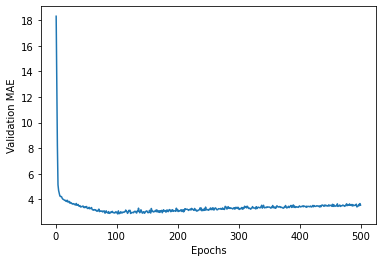

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

This plot highlights how the validation mae doesnt get any lower after the 100 -200 epoch bound. 

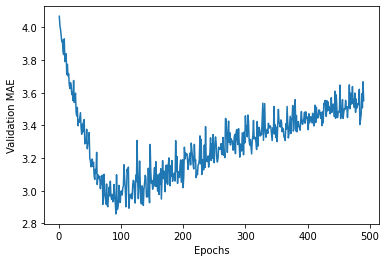

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

This is a clearer view of the which epoch gives the best score and it is clearly the 100 epoch. 

Tuning Neural Network HyperParameters

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
import numpy as np

# the network to be changed via the grid search iterations 
def create_model(optimizer='rmsprop', hidden_layers=2, neurons=64):
    model = keras.Sequential()
    model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)
# grid of different parameters to help identify the best neural network 
param_grid = {
              'neurons': [32, 64, 128],
              'batch_size': [16, 32, 64],
              'epochs': [50, 100, 200],
              'optimizer': ['rmsprop', 'adam']}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=2)
grid_result = grid.fit(partial_train_data, partial_train_targets)

print(f"Best params: {grid_result.best_params_}")



Fitting 5 folds for each of 54 candidates, totalling 270 fits


<ipython-input-193-96714a382166>:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best params: {'batch_size': 32, 'epochs': 200, 'neurons': 64, 'optimizer': 'rmsprop'}


Once again I decided to implement Grid search for the neural network by researching the standard amount of neurons batch size epochs and optimizers as thopse were the ones mostly gone into detailed in the deep learning book in regards to regression. I capped the possibilities for each parameter as i dont have the computational power to leave my laptop on for it to run a long exhaustive search. this website gave me insight on how to perform gridsearch on neural network. https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/. The best parameters returned from it was essentially keeping the model the same except for the batch size. 

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
def build_model():
 model = keras.Sequential([ 
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(1)
 ])
 model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
 return model

In [ ]:
k = 4
num_val_samples = len(nueral_network_train) // k
num_epochs = 200
all_scores = [] 
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = nueral_network_train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = nueral_network_train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [nueral_network_train[:i * num_val_samples],
       nueral_network_train[(i + 1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [nueral_network_train_targets[:i * num_val_samples],
       nueral_network_train_targets[(i + 1) * num_val_samples:]],
       axis=0)
  model = build_model() 
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=32, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[2.64339542388916, 2.778977394104004, 2.9726850986480713, 3.0144503116607666]

In [ ]:
np.mean(all_scores)

2.8523770570755005

When i implement the changes according to thge hyperparameters the mae score is better by 0.1 so this made this model my second choice and it is the best performing model out of all three by far. 

## **Evaluating the two best models on the test set**

In [ ]:
test_X = test_set.drop("Y", axis = 1)
test_y = test_set["Y"].copy()
test_X_prepared = full_pipeline.transform(test_X)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="sag")
ridge_reg.fit(test_X_prepared, test_y)
test_set_predictions = ridge_reg.predict(test_X_prepared)
ridge_mse = mean_squared_error(test_y, test_set_predictions)
ridge_rmse = np.sqrt(ridge_mse)
print("Ridge Regression RMSE on training set:", ridge_rmse)

Ridge Regression RMSE on training set: 4.218716516093932


In [ ]:
def build_model():
 model = keras.Sequential([ 
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(1)
 ])
 model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
 return model

In [ ]:
model = build_model() 
model.fit(test_X_prepared, test_y,epochs=200, batch_size=32, verbose=0)
test_y_predictions = model.predict(test_X_prepared)
mse = mean_squared_error(test_y, test_y_predictions)
rmse = np.sqrt(mse)
print("RMSE on test set:", rmse)

8/8 [==============================] - 0s 2ms/step
RMSE on test set: 2.159468301485215


I finally test the models on the test set and again as expected the nueral network performed significantly better than the ridge regression. The rmse of the nueral network on the test set is 2.159 which is significantly more impressive than the rmse of the ridge regression. 

The models i choose to be used for evaluation by the lecturer is Nueral Network and the Ridge Regression Models as they had the best root mean squared errors out of the three. The Neural Network had an rmse on the training set of 2.85, the ridge regression had an rmse of 4.221 and the linear regression had an rmse on the training set of 4.225. 

## **Evaluation**

Evaluation 
Overall I believe the models i created performed decently well, there isn't much variance in the model predictions as compared to the actual values for the heating load. I do believe my hyper parameter tuning for the neural network and the ridge regression was not as exhaustive as it could have been and next time i need to ensure that i am throughly carrying out lengthy investigations regarding hyper parameter tunings that can give results that give significant improvement in rmse scores.  I also need to use other metrics of performance evaluation like precision, recall, poc etc. 

## **Conclusion**

Conclusion. 
In conclusion, after carefully evaluating the performance of the three models, I believe that the Neural Network and Ridge Regression models are the best choices for this project, as they demonstrated the lowest root mean squared errors (RMSE) among the alternatives. Specifically, the Neural Network achieved an impressive RMSE of 2.85 on the training set, while the Ridge Regression model closely followed with an RMSE of 4.221. In contrast, the Linear Regression model lagged behind with an RMSE of 4.225 on the training set.

These results indicate that both the Neural Network and Ridge Regression models are capable of producing more accurate predictions compared to the Linear Regression model.Therefore i want the ridge regression model and neural network is used for evaluation. I believe the reason they performed so well was do to the fact that both models have hyperparamters that if done corectly can have significant improvement of the results of the model as compared to linear regression and neural networks as stated earlier have the capability to quickly capture relationships better than any other model. 

References

Deep Learning
with Python
SECOND EDITION
FRANÇOIS CHOLLET

Hands-on Machine Learning with
Scikit-Learn, Keras, and
TensorFlow
Concepts, Tools, and Techniques to
Build Intelligent Systems
Aurélien Géron

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

https://www.projectpro.io/recipes/create-and-optimize-baseline-ridge-regression-model

